### Impoting modules

In [206]:
import numpy as np
import pandas as pd
import datetime as dt
import  matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from scipy import stats
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
# Importing applying LabelEncoder on 'business_code' feature
from sklearn.preprocessing import LabelEncoder

### Read DATASET

In [267]:
#Data from 'H2HBABBA2000.csv' is stored in 'df' DataFrame using Pandas
DataF = pd.read_csv('H2HBABBA2222.csv')



In [265]:
DataF.head(10)

,business_code,clear_date,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount
0,U001,2019-10-15 00:00:00,1929922133.0,2019-09-27,20190925,20191012.0,USD,59033.91
1,U001,2019-03-13 00:00:00,1928857809.0,2019-02-26,20190225,20190313.0,USD,24520.58
2,U001,NaN,1930720631.0,2020-03-31,20200331,20200415.0,USD,5795.81
3,U001,NaN,1930666420.0,2020-03-19,20200318,20200403.0,USD,10510.12
4,U001,2019-01-15 00:00:00,1928588116.0,2019-01-08,20190108,20190124.0,USD,99.36
5,U001,2019-08-23 00:00:00,1929733337.0,2019-08-12,20190811,20190827.0,USD,42649.45
6,U001,NaN,1930793629.0,2020-04-16,20200416,20200424.0,USD,8128.38
7,U001,2019-10-24 00:00:00,1929983133.0,2019-10-09,20191008,20191024.0,USD,75321.19
8,U001,2019-11-18 00:00:00,1930123934.0,2019-11-07,20191107,20191124.0,USD,763.06
9,U001,2019-07-25 00:00:00,1929607548.0,2019-07-10,20190710,20190725.0,USD,1534.69


## ------------------------------------------------------------------------------------------------------------------------------------------
### DATA PREPROCESSING / FILTERING

##### Drop Unnecessary Columns

In [209]:
arr = DataF[['doc_id', 'invoice_id']]
arr.corr()

,doc_id,invoice_id
doc_id,1.0,1.0
invoice_id,1.0,1.0


In [210]:
# Droping document_create_date.1 and baseline_create_date due to data duplicacy with posting_date
# Droping name_customer, buisness_year because we don't require these features
# Droping cust_number as it consists inconsistant data
# Droping document type and area_business as they are constant and null columns resp.
# Droping invoice_id as it is a duplicate column of doc_id
# Droping isOpen as after train_test_split it will become constant column
DataF.drop(columns=['cust_number','name_customer', 'buisness_year', 'document_create_date.1', 'document type', 'area_business', 'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen' ], axis=1, inplace=True)

In [211]:
# Notice the deleted columns
DataF.shape

(50000, 9)

##### Dropping Constant Columns

In [212]:
#This will drop 'posting_id' column
DataF = DataF.loc[:,DataF.apply(pd.Series.nunique) != 1]

In [213]:
# Notice the deleted column
DataF.shape

(50000, 8)

In [214]:
# Check for column-wise null values
DataF.isna().sum()

business_code               0
clear_date              10000
doc_id                      0
posting_date                0
document_create_date        0
due_in_date                 0
invoice_currency            0
total_open_amount           0
dtype: int64

##### Drop All Duplicate Rows

In [215]:
#This will remove 1174 duplicate (unwanted) rows
DataF = DataF.drop_duplicates(keep='first')

In [216]:
# Notice the deleted Rows
DataF.shape

(48849, 8)

In [217]:
# Changes the datatype of 'doc_id' column from float to object type
DataF['doc_id'] =DataF['doc_id'].astype(str)


### SPLITTING THE DATASET TO Train_data and Test_data

All the rows in which 'clear_date' column is NULL will be a part of test_data and rest will be our train_data

In [218]:
training = pd.notnull(DataF['clear_date'])
DataF[training].to_csv('train_data.csv', index=False)

In [219]:
testing = pd.isnull(DataF['clear_date'])
DataF[testing].to_csv('test_data.csv', index=False)

### LOAD TRAINING DATA

In [220]:
train = pd.read_csv('train_data.csv')
train.shape

(39111, 8)

In [221]:
train.head()

,business_code,clear_date,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount
0,U001,2019-10-15 00:00:00,1.929922e+09,2019-09-27,20190925,20191012.0,USD,59033.91
1,U001,2019-03-13 00:00:00,1.928858e+09,2019-02-26,20190225,20190313.0,USD,24520.58
2,U001,2019-01-15 00:00:00,1.928588e+09,2019-01-08,20190108,20190124.0,USD,99.36
3,U001,2019-08-23 00:00:00,1.929733e+09,2019-08-12,20190811,20190827.0,USD,42649.45
4,U001,2019-10-24 00:00:00,1.929983e+09,2019-10-09,20191008,20191024.0,USD,75321.19


##### Changing Datatypes of Train Data

In [222]:
# To Check the info of each column in the dataframe
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39111 entries, 0 to 39110
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   business_code         39111 non-null  object 
 1   clear_date            39111 non-null  object 
 2   doc_id                39111 non-null  float64
 3   posting_date          39111 non-null  object 
 4   document_create_date  39111 non-null  int64  
 5   due_in_date           39111 non-null  float64
 6   invoice_currency      39111 non-null  object 
 7   total_open_amount     39111 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 1.8+ MB


In [223]:
# Converts datatype of 'clear_date' to datetime format
train['clear_date'] = pd.to_datetime(train['clear_date'], format='%Y-%m-%d')
# Converts datatype of 'doc_id' to integer type
train['doc_id'] = train['doc_id'].astype(int)
# Converts datatype of 'posting_date' to datetime format
train['posting_date'] = pd.to_datetime(train['posting_date'], format='%Y-%m-%d')
# Converts datatype of 'due_in_date' to datetime format
train['due_in_date'] = pd.to_datetime(train['due_in_date'], format='%Y%m%d')
# Converts datatype of 'document_create_date' to datetime format
train['document_create_date'] = pd.to_datetime(train['document_create_date'], format='%Y%m%d')

##### Convert CAD to USD

In [224]:
# Converts the 'total_open_amount' from CAD to USD (as per the recent market price)
a,b = train.shape
c=0
for i in range(a):
    if (train.iloc[i,train.columns.get_loc('invoice_currency')] == "CAD"):
        train.iloc[i,train.columns.get_loc('total_open_amount')] /= 1.23

##### DROP 'invoice_currency' COLUMN (after convertion from CAD to USD)

In [225]:
train.drop('invoice_currency', axis=1, inplace=True)

##### SORT DATA BY 'posting_date' COLUMN

In [226]:
# Sorts the train data in ascending order on 'posting_date'
train.sort_values(by=['posting_date'], ascending=True, inplace=True)

In [227]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39111 entries, 22157 to 36897
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         39111 non-null  object        
 1   clear_date            39111 non-null  datetime64[ns]
 2   doc_id                39111 non-null  int32         
 3   posting_date          39111 non-null  datetime64[ns]
 4   document_create_date  39111 non-null  datetime64[ns]
 5   due_in_date           39111 non-null  datetime64[ns]
 6   total_open_amount     39111 non-null  float64       
dtypes: datetime64[ns](4), float64(1), int32(1), object(1)
memory usage: 2.1+ MB


In [228]:
train.nunique()

business_code               6
clear_date                402
doc_id                  35943
posting_date              422
document_create_date      426
due_in_date               491
total_open_amount       35605
dtype: int64

#### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#### SPLITTING DATA INTO TRAIN, VALIDATION and TEST SETS

In [229]:
# Splitting the target column from the train data
train['delay'] = (train['clear_date'] - train['due_in_date']).dt.days
X = train.drop('delay', axis=1)
Y = train['delay']

##### Function to Split the Data

In [230]:
from sklearn.model_selection import train_test_split
def split_train_valid_test(X, Y):
    X_train, X_test_init, y_train, y_test_init = train_test_split(X, Y, test_size=.25, random_state=0, shuffle=False, stratify=None)
    X_validation, X_test, y_val, y_test = train_test_split(X_test_init, y_test_init, test_size=.50, random_state=0, shuffle=False, stratify=None)
    return X_train, y_train, X_validation, y_val, X_test, y_test

In [231]:
# Function Calling
train_set, y_train, valid_set, y_valid, test_set, y_test = split_train_valid_test(X, Y)

In [232]:
# To check the data distribution
print(train_set.shape) # 75%
print(valid_set.shape) # 12.5%
print(test_set.shape) # 12.5%

(29333, 7)
(4889, 7)
(4889, 7)


In [233]:
train_set.head()

,business_code,clear_date,doc_id,posting_date,document_create_date,due_in_date,total_open_amount
22157,U001,2019-01-10,1928543601,2018-12-30,2018-12-30,2019-01-14,10831.45
19345,U001,2019-01-14,1928541075,2018-12-30,2018-12-29,2019-01-14,17414.53
30837,U001,2019-01-15,1928536614,2018-12-30,2018-12-29,2019-01-14,67824.54
29713,U001,2019-01-15,1928540649,2018-12-30,2018-12-29,2019-01-14,12190.97
6335,U001,2019-01-14,1928541513,2018-12-30,2018-12-29,2019-01-14,68116.64


## >>>
### EDA

<AxesSubplot:xlabel='delay', ylabel='Density'>

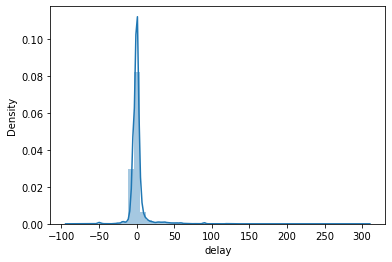

In [234]:
# distribution of the target column i.e 'delay'
# right skewed distribution
# outliers present and that too significantly, hence removal of outliers required
sns.distplot(y_train)

#Several values in our target column are outliers and we have to remove to improve the algorithm

##### To remove outliers

In [235]:
# Merging train_set and y_train
train_set = train_set.merge(y_train, on=train_set.index)

In [236]:
# Removing Outliers
train_set = train_set[(np.abs(stats.zscore(train_set['delay'])) < 3)]
# De-merger of train_set and y_train
y_train = train_set['delay']
train_set = train_set.drop('delay', axis=1)

<AxesSubplot:xlabel='delay', ylabel='Density'>

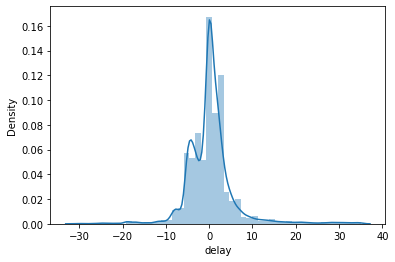

In [237]:
# Distribution of the target column i.e 'delay'
# Data now is a bit normalised
sns.distplot(y_train)

## FEATURE ENGINEERING 

In [238]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28570 entries, 0 to 29332
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   key_0                 28570 non-null  int64         
 1   business_code         28570 non-null  object        
 2   clear_date            28570 non-null  datetime64[ns]
 3   doc_id                28570 non-null  int32         
 4   posting_date          28570 non-null  datetime64[ns]
 5   document_create_date  28570 non-null  datetime64[ns]
 6   due_in_date           28570 non-null  datetime64[ns]
 7   total_open_amount     28570 non-null  float64       
dtypes: datetime64[ns](4), float64(1), int32(1), int64(1), object(1)
memory usage: 1.7+ MB


In [239]:
train_set.head()

,key_0,business_code,clear_date,doc_id,posting_date,document_create_date,due_in_date,total_open_amount
0,22157,U001,2019-01-10,1928543601,2018-12-30,2018-12-30,2019-01-14,10831.45
1,19345,U001,2019-01-14,1928541075,2018-12-30,2018-12-29,2019-01-14,17414.53
2,30837,U001,2019-01-15,1928536614,2018-12-30,2018-12-29,2019-01-14,67824.54
3,29713,U001,2019-01-15,1928540649,2018-12-30,2018-12-29,2019-01-14,12190.97
4,6335,U001,2019-01-14,1928541513,2018-12-30,2018-12-29,2019-01-14,68116.64


In [240]:
train_set.business_code.value_counts()

U001    25765
CA02     2296
U013      401
U002       97
U005        9
U007        2
Name: business_code, dtype: int64

In [241]:
#Now label Encoding for conversion string into numbers

busi_code_enc = LabelEncoder()
busi_code_enc.fit(train_set['business_code'])
train_set['busi_code_enc'] = busi_code_enc.transform(train_set['business_code'])

In [242]:
# Applying changes in valid_set and test_set
valid_set['busi_code_enc'] = busi_code_enc.transform(valid_set['business_code'])
test_set['busi_code_enc'] = busi_code_enc.transform(test_set['business_code'])

In [243]:
# Function will drop a column from train, validation and test dataset
def drop_column(col ,traindf = train_set, valdf = valid_set, testdf = test_set):
    traindf.drop(col, axis =1, inplace=True)
    valdf.drop(col,axis=1 , inplace=True)
    testdf.drop(col,axis=1 , inplace=True)

    return traindf,valdf ,testdf

In [244]:
# Removing unwanted features from all data sets
train_set, valid_set, test_set = drop_column(['business_code'])
train_set, valid_set, test_set = drop_column(['clear_date'])

In [245]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28570 entries, 0 to 29332
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   key_0                 28570 non-null  int64         
 1   doc_id                28570 non-null  int32         
 2   posting_date          28570 non-null  datetime64[ns]
 3   document_create_date  28570 non-null  datetime64[ns]
 4   due_in_date           28570 non-null  datetime64[ns]
 5   total_open_amount     28570 non-null  float64       
 6   busi_code_enc         28570 non-null  int32         
dtypes: datetime64[ns](3), float64(1), int32(2), int64(1)
memory usage: 1.5 MB


##### Converting all datetime features to int type

In [246]:
# Extract day, month and year from posting_date

train_set['Posting_Day'] = train_set['posting_date'].dt.day
train_set['Posting_Month'] = train_set['posting_date'].dt.month
train_set['Posting_Year'] = train_set['posting_date'].dt.year

valid_set['Posting_Day'] = valid_set['posting_date'].dt.day
valid_set['Posting_Month'] = valid_set['posting_date'].dt.month
valid_set['Posting_Year'] = valid_set['posting_date'].dt.year


test_set['Posting_Day'] = test_set['posting_date'].dt.day
test_set['Posting_Month'] = test_set['posting_date'].dt.month
test_set['Posting_Year'] = test_set['posting_date'].dt.year

In [247]:
train_set, valid_set, test_set = drop_column(['posting_date'])

In [248]:
# Extract day, month and year from document_create_date

train_set['Doc_Create_Day'] = train_set['document_create_date'].dt.day
train_set['Doc_Create_Month'] = train_set['document_create_date'].dt.month
train_set['Doc_Create_Year'] = train_set['document_create_date'].dt.year

valid_set['Doc_Create_Day'] = valid_set['document_create_date'].dt.day
valid_set['Doc_Create_Month'] = valid_set['document_create_date'].dt.month
valid_set['Doc_Create_Year'] = valid_set['document_create_date'].dt.year


test_set['Doc_Create_Day'] = test_set['document_create_date'].dt.day
test_set['Doc_Create_Month'] = test_set['document_create_date'].dt.month
test_set['Doc_Create_Year'] = test_set['document_create_date'].dt.year

In [249]:
train_set, valid_set, test_set = drop_column(['document_create_date'])

In [250]:
# Extract day, month and year from due_in_date

train_set['Due_in_Day'] = train_set['due_in_date'].dt.day
train_set['Due_in_Month'] = train_set['due_in_date'].dt.month
train_set['Due_in_Year'] = train_set['due_in_date'].dt.year

valid_set['Due_in_Day'] = valid_set['due_in_date'].dt.day
valid_set['Due_in_Month'] = valid_set['due_in_date'].dt.month
valid_set['Due_in_Year'] = valid_set['due_in_date'].dt.year


test_set['Due_in_Day'] = test_set['due_in_date'].dt.day
test_set['Due_in_Month'] = test_set['due_in_date'].dt.month
test_set['Due_in_Year'] = test_set['due_in_date'].dt.year

In [251]:
train_set, valid_set, test_set = drop_column(['due_in_date'])


In [252]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28570 entries, 0 to 29332
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   key_0              28570 non-null  int64  
 1   doc_id             28570 non-null  int32  
 2   total_open_amount  28570 non-null  float64
 3   busi_code_enc      28570 non-null  int32  
 4   Posting_Day        28570 non-null  int64  
 5   Posting_Month      28570 non-null  int64  
 6   Posting_Year       28570 non-null  int64  
 7   Doc_Create_Day     28570 non-null  int64  
 8   Doc_Create_Month   28570 non-null  int64  
 9   Doc_Create_Year    28570 non-null  int64  
 10  Due_in_Day         28570 non-null  int64  
 11  Due_in_Month       28570 non-null  int64  
 12  Due_in_Year        28570 non-null  int64  
dtypes: float64(1), int32(2), int64(10)
memory usage: 2.8 MB


In [253]:
train_set.drop(['key_0'], axis=1, inplace=True)

## ***
### FEATURE SELECTION***

##### Using Heatmap showing correlation with target column

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

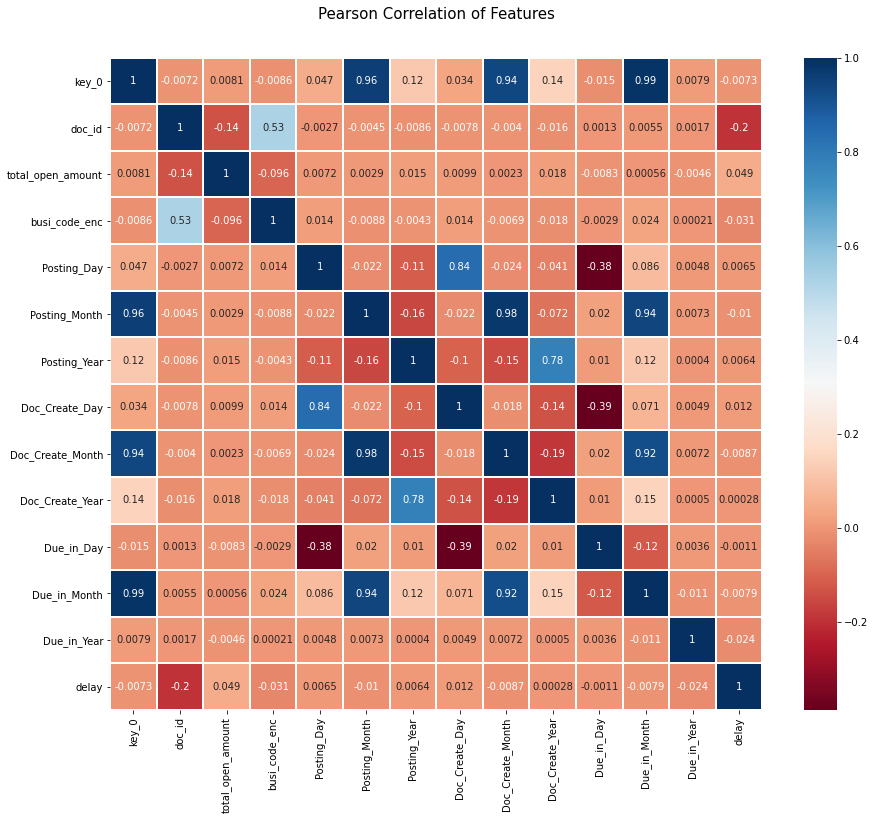

In [254]:
colormap = plt.cm.RdBu
plt.figure(figsize=(15,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train_set.merge(y_train, on = train_set.index ).corr(),
            linewidths=0.1, vmax=1.0, square=True, 
            cmap=colormap, linecolor='white', annot=True)

In [255]:
# From the above Graph we can see that 'due_in_Year' is a constant feature, hence we have to drop this feature
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(0.8)
sel.fit(train_set)
sel.variances_

array([1.22913686e+18, 1.41421557e+09, 3.09821071e-01, 7.63293448e+01,
       7.95573843e+00, 4.56420493e-03, 7.59702174e+01, 8.00614138e+00,
       6.98585559e-03, 7.72658459e+01, 8.11008984e+00, 3.50005250e-05])

In [264]:
# Dropping the feature
train_set, valid_set, test_set = drop_column(['Due_in_Year'])

KeyError: "['Due_in_Year'] not found in axis"

### MODELLING

### >>>>>>> LINEAR REGRESSION MODEL

In [257]:
from sklearn.metrics import accuracy_score

In [258]:
from sklearn.linear_model import LinearRegression
base_model = LinearRegression()
base_model.fit(train_set, y_train)

train_set

,doc_id,total_open_amount,busi_code_enc,Posting_Day,Posting_Month,Posting_Year,Doc_Create_Day,Doc_Create_Month,Doc_Create_Year,Due_in_Day,Due_in_Month
0,1928543601,10831.45,1,30,12,2018,30,12,2018,14,1
1,1928541075,17414.53,1,30,12,2018,29,12,2018,14,1
2,1928536614,67824.54,1,30,12,2018,29,12,2018,14,1
3,1928540649,12190.97,1,30,12,2018,29,12,2018,14,1
4,1928541513,68116.64,1,30,12,2018,29,12,2018,14,1
...,...,...,...,...,...,...,...,...,...,...,...
29328,1930055349,17255.72,1,28,10,2019,26,10,2019,12,11
29329,1930056503,846.42,1,28,10,2019,27,10,2019,12,11
29330,1930053925,55364.76,1,28,10,2019,25,10,2019,27,11
29331,1930056093,19261.85,1,28,10,2019,27,10,2019,12,11


##### Prediction on Validation data

In [259]:
from sklearn.metrics import mean_squared_error
y_predict = base_model.predict(valid_set)
# Calculating the mean error
mean_squared_error(y_valid, y_predict, squared=False)
valid_set

,doc_id,total_open_amount,busi_code_enc,Posting_Day,Posting_Month,Posting_Year,Doc_Create_Day,Doc_Create_Month,Doc_Create_Year,Due_in_Day,Due_in_Month
8453,1930046849,1296.080000,1,28,10,2019,23,10,2019,12,11
579,1930057447,537.950000,1,28,10,2019,28,10,2019,12,11
680,1930055165,18625.990000,1,28,10,2019,26,10,2019,12,11
26758,1930054194,63744.840000,1,28,10,2019,26,10,2019,12,11
38686,1930058840,40237.770000,1,28,10,2019,28,10,2019,12,11
...,...,...,...,...,...,...,...,...,...,...,...
3638,1991836682,16511.050000,5,31,12,2019,31,12,2019,14,2
15895,1930378092,9343.970000,1,31,12,2019,8,1,2020,3,2
38904,1930323729,10073.080000,1,31,12,2019,30,12,2019,15,1
8639,1930332682,21663.760000,1,31,12,2019,31,12,2019,15,1


### >>>>>>> DECISION TREE  MODEL

In [260]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth=2, min_weight_fraction_leaf=0.1, random_state=0, max_leaf_nodes=2)
regressor.fit(train_set, y_train)

DecisionTreeRegressor(max_depth=2, max_leaf_nodes=2,
                      min_weight_fraction_leaf=0.1, random_state=0)

##### Prediction on Validation data

In [261]:
y_predict2 = regressor.predict(valid_set)
mean_squared_error(y_valid, y_predict2, squared=False)


6.086814326041177

##### Prediction on mini-Testing data

In [262]:
y_predict3 = regressor.predict(test_set)
mean_squared_error(y_test, y_predict3, squared=False)

11.683501178154893